In [1]:
import warnings
warnings.filterwarnings("ignore")

# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Necessary Libraries

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
news_train=pd.read_csv('/content/drive/MyDrive/FAKE_NEWS/train.csv')
news_test=pd.read_csv('/content/drive/MyDrive/FAKE_NEWS/test.csv')

In [5]:
print(news_train.shape)
print(news_test.shape)

(20800, 5)
(5200, 4)


In [6]:
news_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Pre-Processing

In [7]:
news_test['label']='test'

In [8]:
df=pd.concat([news_train,news_test],axis=0)

In [9]:
df.shape

(26000, 5)

In [10]:
df.sample(3)

,id,title,author,text,label
9533,9533,Clinton Campaign Questions Release Of FBI's Ma...,NaN,Clinton Campaign Questions Release Of FBI's Ma...,1
931,931,Can You Hear Agnes Martin’s Serenity in John Z...,Zachary Woolfe,"There could not, on first glance or listen, be...",0
17079,17079,Steve Jobs Told Mark Zuckerberg To Visit This ...,Eddy Lavine,"posted by Eddie During the Indian PM, Narendra...",1


In [11]:
df.tail(3)

,id,title,author,text,label
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,test
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,test
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,test


In [12]:

df.isnull().sum()/df.shape[0]*100 # percentage of null values (0-row values only,1-columns)

id        0.000000
title     2.615385
author    9.461538
text      0.176923
label     0.000000
dtype: float64

## Since The Data has less number of Null values , so we dropped.

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
df['content']=df.author + ' ' + df.text

In [18]:
print(df['content'])

0       Darrell Lucus House Dem Aide: We Didn’t Even S...
1       Daniel J. Flynn Ever get the feeling your life...
2       Consortiumnews.com Why the Truth Might Get You...
3       Jessica Purkiss Videos 15 Civilians Killed In ...
4       Howard Portnoy Print \nAn Iranian woman has be...
                              ...                        
5194    Pam Key Pres. Trump on if “tapes” exist of his...
5195    Jody Rosen Of all the dysfunctions that plague...
5196    Sheryl Gay Stolberg WASHINGTON  —   Gov. John ...
5197    Mike McPhate Good morning. (Want to get Califo...
5199    Teddy Wayne Perhaps you’ve seen the new TV ser...
Name: content, Length: 22860, dtype: object


In [19]:
port_stem=PorterStemmer()

In [20]:
def stemming(text):
  stem=re.sub('[^a-zA-Z]',' ',text) # re= regular expression substitute
  stem=stem.lower()
  stem=stem.split()
  stem=[port_stem.stem(word) for word in stem if not word in stopwords.words('english')] # converting string to list
  stem=' '.join(stem) # converting list to string
  return stem

In [21]:
df['content']=df['content'].apply(stemming)

In [22]:
print(df["content"])

0       darrel lucu hous dem aid even see comey letter...
1       daniel j flynn ever get feel life circl rounda...
2       consortiumnew com truth might get fire octob t...
3       jessica purkiss video civilian kill singl us a...
4       howard portnoy print iranian woman sentenc six...
                              ...                        
5194    pam key pre trump tape exist convers comey wel...
5195    jodi rosen dysfunct plagu world megac none may...
5196    sheryl gay stolberg washington gov john kasich...
5197    mike mcphate good morn want get california tod...
5199    teddi wayn perhap seen new tv seri whose pilot...
Name: content, Length: 22860, dtype: object


In [23]:
df_new=df[['content','label']]

In [24]:
df_new.head(3)

,content,label
0,darrel lucu hous dem aid even see comey letter...,1
1,daniel j flynn ever get feel life circl rounda...,0
2,consortiumnew com truth might get fire octob t...,1


In [25]:
df_train=df_new[df_new['label']!='test']
df_test=df_new[df_new['label']=='test']

In [26]:
df_train.tail()

,content,label
20795,jerom hudson rapper unload black celebr met do...,0
20796,benjamin hoffman green bay packer lost washing...,0
20797,michael j de la merc rachel abram maci today g...,0
20798,alex ansari nato russia hold parallel exercis ...,1
20799,david swanson david swanson author activist jo...,1


In [27]:
df_test.tail()

,content,label
5194,pam key pre trump tape exist convers comey wel...,test
5195,jodi rosen dysfunct plagu world megac none may...,test
5196,sheryl gay stolberg washington gov john kasich...,test
5197,mike mcphate good morn want get california tod...,test
5199,teddi wayn perhap seen new tv seri whose pilot...,test


In [28]:
df_test.drop(columns='label',inplace=True)

In [29]:
vectorizer=TfidfVectorizer()

In [30]:
x=df_train['content'].values
y=df_train['label'].values
y=y.astype('int')

In [31]:
vectorizer.fit(x)
x=vectorizer.transform(x)

In [36]:
import pickle
x_pickle=open('x.pickle','wb')
pickle.dump(x,x_pickle)
x_pickle.close()

In [38]:
y_pickle=open('y.pickle','wb')
pickle.dump(y,y_pickle)
y_pickle.close()

In [37]:
pickle_x=open('/content/x.pickle','rb')
x=pickle.load(pickle_x)

In [39]:
pickle_y=open('/content/y.pickle','rb')
y=pickle.load(pickle_y)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [41]:
logit=LogisticRegression(max_iter=1000)

In [42]:
logitmodel=logit.fit(x_train,y_train)

In [43]:
logitmodel.score(x_train,y_train)

0.9786026797921794

In [44]:
logitmodel.score(x_test,y_test)

0.9488651900464862

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [46]:
y_pred=logit.predict(x_test)

In [47]:
confusion_matrix(y_pred,y_test)

array([[1990,  105],
       [  82, 1480]])

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2095
           1       0.93      0.95      0.94      1562

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



In [49]:
roc_auc_score(y_test,y_pred) 

0.9470893268211881

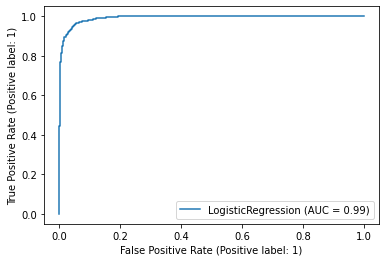

In [50]:
plot_roc_curve(logitmodel,x_test,y_test)

In [51]:
u=vectorizer.transform(df_test['content'].values) # vectorization of test data

In [59]:
logitpred=logitmodel.predict(u)

In [60]:
logitpred=pd.DataFrame(logitpred,columns=['label'])

In [61]:
logitpred

,label
0,0
1,1
2,0
3,1
4,0
...,...
4570,0
4571,0
4572,0
4573,0


In [62]:
logitpred.to_csv('logitsub.csv')